# Twittercheck

Lets go bot hunting...

Twitter library: need to read these: 
* https://pypi.python.org/pypi/twitter
* https://developer.twitter.com/en/docs/basics/cursoring

In [55]:
import twitter
import pandas as pd
import time
pd.set_option('max_columns', 1000)
import matplotlib.pyplot as plt
%matplotlib inline


fsecret = open('../../../../twittersecrets.txt', 'r')
secrets = fsecret.readline()
ACCESS_TOKEN, ACCESS_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET = secrets.strip().split(',')
ACCESS_TOKEN = ACCESS_TOKEN.strip()
ACCESS_TOKEN_SECRET = ACCESS_TOKEN_SECRET.strip()
CONSUMER_KEY = CONSUMER_KEY.strip()
CONSUMER_SECRET = CONSUMER_SECRET.strip()

auth = twitter.oauth.OAuth(ACCESS_TOKEN, ACCESS_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
ta = twitter.Twitter(auth=auth)

friendjson = ta.followers.list(count=200)
dsfriends = pd.DataFrame(friendjson['users'])
nextfriend = friendjson['next_cursor']
nextfriend

1550529320896969122

In [ ]:
while nextfriend > 0:
    try:
        print('from {}'.format(nextfriend))
        friendjson = ta.followers.list(cursor = nextfriend)
        dsfriends = dsfriends.append(pd.DataFrame(friendjson['users']))
        if friendjson['next_cursor'] == nextfriend:
            # Stop if you start getting the same next_cursor without a timeout warning
            break
        nextfriend = friendjson['next_cursor']
        time.sleep(1)
    except:
        print('Twitter timed out')
        time.sleep(15*60 +10) #Twitter has a 15-minute timeout
dsfriends

## Look at the dataset

In [103]:
# Grab a copy of the dataset to play with (e.g. if we're waiting on twitter timeouts)
df = dsfriends
print('{}'.format(len(df)))
df['created_at'] = pd.to_datetime(df['created_at'])
# df.drop_duplicates(['id'], keep='first')
dfstatus = df['status'].apply(pd.Series)
dfstatus.columns = ['status_{}'.format(col) for col in dfstatus.columns]
df = pd.concat([df, dfstatus], axis=1).reset_index()
df[['screen_name', 'description', 'created_at', 'status_created_at']]

780


/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,screen_name,description,created_at,status_created_at
0,carlgieringer,"In a time of universal deceit, telling the tru...",2009-03-10 22:09:11,Tue Mar 13 19:01:46 +0000 2018
1,VexataCorp,Vexata’s breakthrough #Enterprise #Solutions b...,2017-05-15 18:21:07,Wed Mar 14 00:50:06 +0000 2018
2,shomitmitter,"London-based therapist, helping people who've ...",2009-08-16 10:28:37,Mon Mar 12 08:41:04 +0000 2018
3,ldvcapital,Investing in people building #visualtechnologi...,2013-05-17 21:38:30,Tue Mar 13 20:16:02 +0000 2018
4,kasperulvedal,"Business Consultant, Partner @ Anvido - Passio...",2008-05-31 13:05:55,Mon Feb 05 22:08:43 +0000 2018
5,DanMeropol,,2009-11-14 23:49:51,NaN
6,dezren39,"Computers and stuff, yay!",2008-09-07 20:32:48,Wed Mar 14 00:49:49 +0000 2018
7,_delta_zero,Data Scientist in #InfoSec. PhD candidate. #Py...,2015-01-30 00:23:11,Sun Mar 11 22:19:16 +0000 2018
8,roslynfrank555,,2017-11-08 06:46:42,NaN
9,AdilHas41303295,,2018-03-02 03:12:14,Mon Mar 12 21:13:12 +0000 2018


Text(0,0.5,'account created')

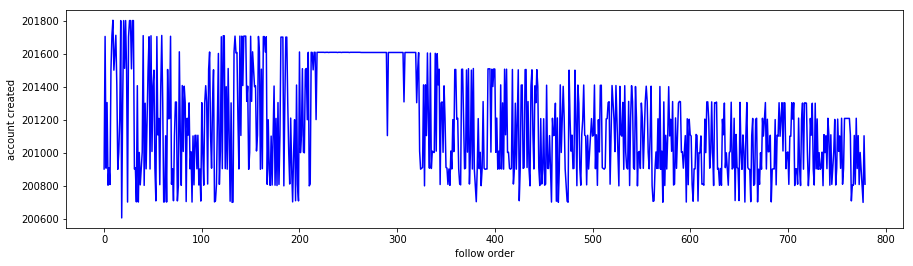

In [104]:
# Now do something with it
# Look at index vs month account was created. 
# OMG they were geography students on an assignment!
plt.figure(figsize=(15,4))
dfsub = df #[200:350]
plt.plot(dfsub.index, dfsub['created_at'].dt.year*100 + dfsub['created_at'].dt.month, 'b-')
plt.xlabel('follow order')
plt.ylabel('account created')

In [105]:
df[218:320][['created_at', 'screen_name', 'name', 'location', 'description', 'followers_count', 'friends_count']]

,created_at,screen_name,name,location,description,followers_count,friends_count
218,2016-09-08 14:53:41,tyl0882,Ebonaye Tyler,"California, PA",,1,62
219,2016-09-12 04:06:28,shaunacousar1,Shauna,,,0,69
220,2016-09-02 14:41:29,geostudent0,Travis parasolick,,,0,83
221,2016-09-06 01:52:59,Cor4711,Luke Cordle,,,8,64
222,2016-09-03 14:41:54,char6696,Char Thomas,,,0,62
223,2016-09-09 18:58:42,mike_fig1401,mike figueroa,,,0,53
224,2016-09-07 22:39:28,SamTrack2020,Katrina,,,1,112
225,2016-09-08 02:20:49,diamonepatton,Diamone Patton,,,0,57
226,2016-08-31 20:37:55,BryceBaliff,Bryce Baliff,,,3,53
227,2016-09-07 21:38:57,dev_cal75,Dominick Devenney,,,0,53
